# Contents
### 1. Import Libraries
### 2. Security Implications
### 3. Region Column
### 4. Spending Trends
### 5. Create an Activity Flag
### 6. Customer Profile
### 7. Profile by Department
### 8. Export


# 1. Import Libraries

In [26]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [27]:
# Create a Path
path = r'/Users/wiltonngo/InstaCart Basket Analysis'

In [28]:
# Import the complete the Data Set
df= pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'dataframe_combined.pkl'))

In [29]:
# importing department dictionary data
df_dict = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'df_dep_t_new.csv'), index_col = 0)

# 2. Security Implications

In [30]:
# Check the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   order_id               int64   
 1   user_id                int64   
 2   order_number           int64   
 3   order_day_of_week      int64   
 4   order_hour_of_day      int64   
 5   days_since_last_order  float64 
 6   product_id             int64   
 7   add_to_cart_order      int64   
 8   reordered              int64   
 9   product_name           object  
 10  aisle_id               int64   
 11  department_id          int64   
 12  prices                 float64 
 13  _merge                 category
 14  price_range_loc        object  
 15  Busiest Day            object  
 16  Busiest Period of Day  object  
 17  max_order              int64   
 18  loyatly_flags          object  
 19  avg_price              float64 
 20  spending_flag          object  
 21  Meidan_Freq            float6

In [31]:
df['prices'] = df['prices'].astype(int)

In [32]:
df[((df['order_hour_of_day']) == 3 & (df['prices']> 100))]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,Meidan_Freq,order_freq_flag,gender,state,age,date_joined,dependants_number,family_status,income
5484,1777553,778,5,2,0,2.0,196,5,0,Soda,...,Low spender,4.0,Frequent Customer,Female,Idaho,78,11/19/2018,3,married,161489
5491,1777553,778,5,2,0,2.0,16797,10,1,Strawberries,...,Low spender,4.0,Frequent Customer,Female,Idaho,78,11/19/2018,3,married,161489
5502,1504208,778,39,2,0,6.0,16797,16,1,Strawberries,...,Low spender,4.0,Frequent Customer,Female,Idaho,78,11/19/2018,3,married,161489
5513,1504208,778,39,2,0,6.0,24852,2,1,Banana,...,Low spender,4.0,Frequent Customer,Female,Idaho,78,11/19/2018,3,married,161489
5527,1777553,778,5,2,0,2.0,26882,6,0,Russet Potatoes,...,Low spender,4.0,Frequent Customer,Female,Idaho,78,11/19/2018,3,married,161489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404702,3063168,106304,3,0,0,30.0,15831,2,1,Kosher Chicken Breasts Boneless And Skinless,...,High spender,16.0,Regular Customer,Female,Maine,63,5/31/2017,0,divorced/widowed,96373
32404703,2528434,106304,4,0,0,0.0,15831,1,1,Kosher Chicken Breasts Boneless And Skinless,...,High spender,16.0,Regular Customer,Female,Maine,63,5/31/2017,0,divorced/widowed,96373
32404831,218446,106143,3,4,0,8.0,19675,1,1,Organic Raspberry Black Tea,...,High spender,7.0,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755
32404835,2409631,106143,7,1,0,14.0,19675,1,1,Organic Raspberry Black Tea,...,High spender,7.0,Frequent Customer,Male,Hawaii,25,5/26/2017,0,single,53755


### The dataset contains age, name and State, which we will have consider the Pll. We removed the name to protect their privacy. The Age and state are not enough to identify the individual therefore we can continue with the project

# 3. Region Column

### You need to create a Region column based on the State column from your customers data set

In [33]:
# Create your first Region called NorthEast
df.loc[df['state'].isin(['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York',
                        'Pennsylvania','New Jersey']),'Region'] = 'NorthEast'
#create your Second Region called MidWest
df.loc[df['state'].isin(['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska',
                        'Kansas','Minnesota','Iowa','Missouri']),'Region'] = 'Midwest'
# Create a Third Region called South
df.loc[df['state'].isin(['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina',
                        'Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas',
                        'Louisiana']),'Region'] = 'South'
# Create a last Region called West
df.loc[df['state'].isin(['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington',
                        'Oregon','California','Hawaii']),'Region'] = 'West'

In [34]:
# Checking Region Col
df['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
NorthEast     5722736
Name: Region, dtype: int64

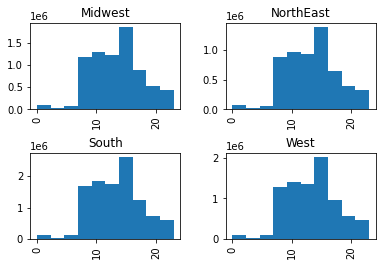

In [35]:
Region_order_of_day = df.hist(column = 'order_hour_of_day', by ='Region')

In [36]:
df.hist(column = 'prices', by ='')

KeyError: ''

In [ ]:
df['order_hour_of_day'].describe()

In [ ]:
# Exporting the Images
Region_order_of_day.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'regional_orders.png'))

In [ ]:
# Finding NaN states 
df[df['Region'].isnull()]

# 4. Spending Trends in different U.S. Regions

In [ ]:
# crossing the region and spending crosstab
region_spending = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)

In [ ]:
# View the region spending
region_spending.head()

In [ ]:
# bar graph for the spending flag distribution 
region_spending_bar = region_spending.plot.bar()

### South has the Most customers for high spender and low spender. Foloowed by the West and NorthWest.

# 5. Create an exclusion flag for low_activity customers with less than five orders and exclude from the data

In [ ]:
df.info()

In [ ]:
# creating the low_activity flag
df.loc[df['max_order'] < 5, 'activity_customers'] = 'low activity'

In [ ]:
# Create a high activy flag
df.loc[df['max_order'] >= 5, 'activity_customers'] = 'High activity'

In [ ]:
# Checking the Activity column
df['activity_customers'].value_counts(dropna = False)

In [ ]:
# Create a datafrfame without the low acticity
df_active_customers = df.loc[df['activity_customers'] == 'High activity']

In [ ]:
# Checkout the new dataframe
df_active_customers.head()

# 6. Customer Profiling variable

## They want to create a profiling vaiable base on age,income,cetain goods in the department_id column and number of dependents

In [ ]:
# descriptive statistics on the age, income, and number of dependents parameters
df[['age', 'income','dependants_number']].describe()

In [ ]:
df_dict

In [ ]:
# new parent profile (including parents that have a new babies but multiple children)
df.loc[(df['dependants_number'] >= 1) &  (df['department_id'] == 18), 'Customer_profile'] = 'New Parent'

In [ ]:
# single adult profile
df.loc[(df['dependants_number'] == 0) &  (df['age'] < 65), 'Customer_profile'] = 'Single Adult'

In [ ]:
# single parent profile
df.loc[(df['dependants_number'] >= 1) & (df['income'] < 50000) &  (df['department_id'] != 18), 'Customer_profile'] = 'Single Parent'

In [ ]:
# partnered parent profile
df.loc[(df['dependants_number'] >= 1) & (df['income'] >= 50000) &  (df['department_id'] != 18), 'Customer_profile'] = 'Married Parents'

In [ ]:
# retired adult profile
df.loc[(df['dependants_number'] == 0) &  (df['age'] >= 65), 'Customer_profile'] = 'Retired Adult'

In [ ]:
# Check the frequency for Customer Profile
df['Customer_profile'].value_counts()

In [ ]:
#Profile distribution
profile_dist_bar = df['Customer_profile'].value_counts().plot.bar()

In [25]:
df.plot(data = df, x='Customer_profile', y='prices', kind = "bar")

KeyError: 'Customer_profile'

### Most Customers are married Parents following by single adult and single parent

# Customer_Profile Aggregation

In [27]:
# grouping profiles by mean, max, and min expenditure 
df.groupby('Customer_profile').agg({'prices' : ['mean', 'max', 'min']})

prices              
                       mean      max  min
Customer_profile                         
Married Parents   12.649539  99999.0  1.0
New Parent         7.650679     15.0  1.0
Retired Adult     11.905177  99999.0  1.0
Single Adult      12.208715  99999.0  1.0
Single Parent      6.691449     25.0  1.0

In [28]:
# grouping profiles by mean, max, and min usage frequency (with days_since_prior_order)
df.groupby('Customer_profile').agg({'days_since_last_order' : ['mean', 'max', 'min']})

days_since_last_order           
                                  mean   max  min
Customer_profile                                 
Married Parents              11.066002  30.0  0.0
New Parent                    9.963975  30.0  0.0
Retired Adult                11.065273  30.0  0.0
Single Adult                 11.086311  30.0  0.0
Single Parent                11.621855  30.0  0.0

In [29]:
# crosstab comparing profiles and region
regional_profiles = pd.crosstab(df['Customer_profile'], df['Region'])
regional_profiles

Region,Midwest,NorthEast,South,West
Customer_profile,,,,
Married Parents,4991867,3788490,7080228,5462548
New Parent,73594,56621,107309,79784
Retired Adult,492762,395847,691055,540420
Single Adult,1412438,1022454,2010604,1531923
Single Parent,626664,459324,902689,678238


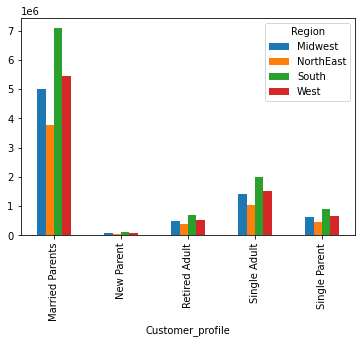

In [30]:
regional_profiles_bar = regional_profiles.plot.bar()

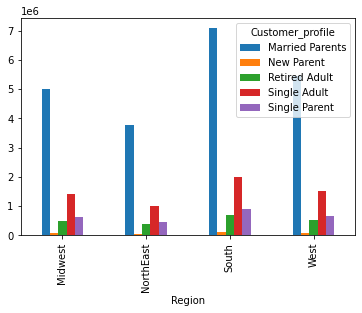

In [31]:
# creating a crosstab of the profiles by region
prof_by_reg = pd.crosstab(df['Region'], df['Customer_profile'])
prof_by_reg_bar = prof_by_reg.plot.bar()

### Married Parents send the most for all of the Regions. The South Region Spend the most

### Married Parents spend the most on average above New parents buys the most 

# 7.Profiles by department

In [32]:
# creating crosstab of profiles by departments
prof_by_dep = pd.crosstab(df['department_id'], df['Customer_profile'])

In [33]:
prof_by_dep

Customer_profile,Married Parents,New Parent,Retired Adult,Single Adult,Single Parent
department_id,,,,,
1,1502578,0,148333,408827,175005
2,24102,0,2291,6884,3014
3,791765,0,76021,218384,86258
4,6442856,0,623025,1752420,660990
5,99495,0,9764,29354,15083
6,184106,0,17494,50219,17434
7,1709435,0,176427,498015,304246
8,66211,0,7024,17559,6922
9,598751,0,56303,158959,52614


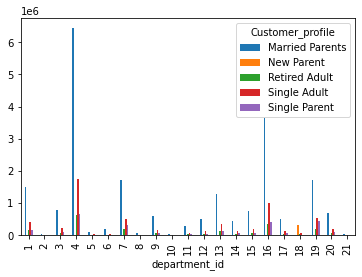

In [39]:
prof_by_dep_bar = prof_by_dep.plot.bar()

### Most purchased From Married Parents are Produce Dairy Eggs. 

# 8.Export

In [ ]:
# Exporting the Images
region_spending_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'regional_spending_bar.png'))
# Export the new DataFrame
df_active_customers.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'active_users_sample.pkl'))
# exporting the visualiation
profile_dist_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'profile_distibution_bar.png'))
# exporting the profile by region bar graph
prof_by_reg_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'profiles_by_region_bar.png'))
# exporting the profiles by department bar graph
prof_by_dep_bar.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'profiles_by_department.png'))
df.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customers_merged_final.pkl'))